In [13]:
from dsc80_utils import *

# Lecture 5 – Exploratory Data Analysis and Data Cleaning

## DSC 80, Summer 2025

### Announcements 📣

- Project 1 is due on **Saturday, August 16th**.
- Lab 2 is due on **Tuesday, August 12th**.

### Agenda 📆

- Other data representations.
- Dataset overview.
- Introduction to `plotly`.
- Exploratory data analysis and feature types.
- Data cleaning.
    - Data quality checks.
    - Missing values.
    - Transformations and timestamps.
    - Modifying structure.
- Investigating student-submitted questions!

## Other data representations

### Representations of tabular data

- In DSC 80, we work with DataFrames in `pandas`.
    - When we say `pandas` DataFrame, we're talking about the `pandas` API for its DataFrame objects.
        - API stands for "application programming interface." We'll learn about these more soon.
    - When we say "DataFrame", we're referring to a general way to represent data (rows and columns, with labels for both rows and columns).

- There many other ways to work with data tables! 
    - Examples: R data frames, SQL databases, spreadsheets, or even matrices from linear algebra.
    - When you learn SQL in DSC 100, you'll find many similaries (e.g. slicing columns, filtering rows, grouping, joining, etc.).
    - **Relational algebra** captures common data operations between many data table systems.

- Why use DataFrames over something else?

### DataFrames vs. spreadsheets

- DataFrames give us a **data lineage**: the code records down data changes. Not so in spreadsheets!
- Using a general-purpose programming language gives us the ability to handle much larger datasets, and we can use distributed computing systems to handle massive datasets.

### DataFrames vs. matrices

\begin{split}
\begin{aligned}
\mathbf{X} = \begin{bmatrix}
1 & 0 \\
0 & 4 \\
0 & 0 \\
\end{bmatrix}
\end{aligned}
\end{split}

- Matrices are mathematical objects. They only hold numbers, but have many useful properties (which you've learned about in your linear algebra class, Math 18).
- Often, we process data from a DataFrame into matrix format for machine learning models. You saw this a bit in DSC 40A, and we'll see this more in DSC 80 in a few weeks.

### DataFrames vs. relations

- Relations are the data representation for relational database systems (e.g. MySQL, PostgreSQL, etc.).
- You'll learn all about these in DSC 100.
- Database systems are much better than DataFrames at storing **many** data tables and handling concurrency (many people reading and writing data at the same time).
- Common workflow: load a subset of data in from a database system into `pandas`, then make a plot.
- Or: load and clean data in `pandas`, then store it in a database system for others to use.

## Dataset overview

### San Diego food safety

From [this article](https://inewsource.org/2023/02/09/san-diego-restaurants-food-safety-violations/) ([archive link](https://archive.ph/gz8BL)):

> In the last three years, one third of San Diego County restaurants have had at least one major food safety violation.

### 99% Of San Diego Restaurants Earn ‘A' Grades, Bringing Usefulness of System Into Question

From [this article](https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/) ([archive link](https://archive.ph/yB6RU)):

> Food held at unsafe temperatures. Employees not washing their hands. Dirty countertops. Vermin in the kitchen. An expired restaurant permit.
> 
> Restaurant inspectors for San Diego County found these violations during a routine health inspection of a diner in La Mesa in November 2016. Despite the violations, the restaurant was awarded a score of 90 out of 100, the lowest possible score to achieve an ‘A’ grade.

### The data

- We downloaded the data about the 1000 restaurants closest to UCSD from [here](https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html).
- We had to download the data as JSON files, then process it into DataFrames. You'll learn how to do this soon!
    - Until now, you've (largely) been presented with CSV files that `pd.read_csv` could load without any issues.
    - But there are many different formats and possible issues when loading data in from files.
    - See [Chapter 8 of Learning DS](https://learningds.org/ch/08/files_intro.html) for more.

In [112]:
rest_path = Path('data') / 'restaurants.csv'
insp_path = Path('data') / 'inspections.csv'
viol_path = Path('data') / 'violations.csv'

In [113]:
rest = pd.read_csv(rest_path)
insp = pd.read_csv(insp_path)
viol = pd.read_csv(viol_path)

<div class="alert alert-success">
    <h3>Exercise</h3>
    The first article said that one third of restaurants had at least one major safety violation.<br>
    Which DataFrames and columns seem most useful to verify this?
</div>

In [114]:
rest

,business_id,name,business_type,address,...,lat,long,opened_date,distance
0,211898487641,MOBIL MART LA JOLLA VILLAGE,Pre-Packaged Retail Market,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",...,32.87,-117.23,2002-05-05,0.62
1,211930769329,CAFE 477,Low Risk Food Facility,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",...,32.87,-117.24,2023-07-24,0.64
2,211909057778,VALLEY FARM MARKET,Retail Market with Deli,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",...,32.87,-117.24,2019-01-22,0.64
...,...,...,...,...,...,...,...,...,...
997,211899338714,PACIFIC BEACH ELEMENTARY,School Processing Food Facility,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",...,32.81,-117.25,2002-05-05,4.97
998,211942150255,POKEWAN DEL MAR,Restaurant Food Facility,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",...,32.95,-117.23,2016-11-03,4.97
999,211925713322,SAFFRONO LOUNGE RESTAURANT,Restaurant Food Facility,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",...,32.95,-117.25,2022-11-03,4.97


In [115]:
rest.columns

Index(['business_id', 'name', 'business_type', 'address', 'city', 'zip',
       'phone', 'status', 'lat', 'long', 'opened_date', 'distance'],
      dtype='object')

In [116]:
insp.head()

,custom_id,business_id,inspection_id,description,...,completed_date,status,link,status_link
0,DEH2002-FFPN-310012,211898487641,6886133,NaN,...,2023-02-16,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
1,DEH2002-FFPN-310012,211898487641,6631228,NaN,...,2022-01-03,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
2,DEH2002-FFPN-310012,211898487641,6357338,NaN,...,2020-12-03,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
3,DEH2023-FFPP-016887,211930769329,7329834,NaN,...,2023-09-20,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
4,DEH2019-FFPP-010654,211909057778,7233091,NaN,...,2023-05-26,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...


In [117]:
insp.columns

Index(['custom_id', 'business_id', 'inspection_id', 'description', 'type',
       'score', 'grade', 'completed_date', 'status', 'link', 'status_link'],
      dtype='object')

In [118]:
viol.head()

,inspection_id,violation,major_violation,status,violation_text,correction_type_link,violation_accela,link
0,6886133,Hot and Cold Water,Y,Out of Compliance - Major,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
1,6631228,Hot and Cold Water,N,Out of Compliance - Minor,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
2,6357338,Holding Temperatures,N,Out of Compliance - Minor,Holding Temperatures,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,7. Proper hot & cold holding temperatures,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
3,6939628,Holding Temperatures,Y,Out of Compliance - Major,Holding Temperatures,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,7. Proper hot & cold holding temperatures,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
4,6939628,Approved Procedures,N,Out of Compliance - Minor,Approved Procedures,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,18. Compliance with,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...


In [119]:
viol.columns

Index(['inspection_id', 'violation', 'major_violation', 'status',
       'violation_text', 'correction_type_link', 'violation_accela', 'link'],
      dtype='object')

### Introduction to `plotly`

### `plotly`

- We've used `plotly` in lecture briefly, and you even have to use it in Project 1 Question 13, but we haven't yet discussed it formally.

- It's a visualization library that enables **interactive** visualizations.

<center><img src="imgs/plotly.png" width=40%></center>

### Using `plotly`

There are a few ways we can use `plotly`:

- Using the `plotly.express` syntax.
    - `plotly` is very flexible, but it can be verbose; `plotly.express` allows us to make plots quickly.
    - See the [**documentation here**](https://plotly.com/python/plotly-express) – it's very rich (there are good examples for almost everything).

- By setting `pandas` plotting backend to `'plotly'` (by default, it's `'matplotlib'`) and using the DataFrame `plot` method.
    - The DataFrame `plot` method is how you created plots in DSC 10!

For now, we'll use `plotly.express` syntax; we've imported it in the `dsc80_utils.py` file that we import at the top of each lecture notebook.

### Initial plots

First, let's look at the distribution of inspection `'score'`s:

In [120]:
# Needed to add renderer
import plotly.io as pio

# Notebook 7 (new Jupyter) – best bet:
pio.renderers.default = "plotly_mimetype"


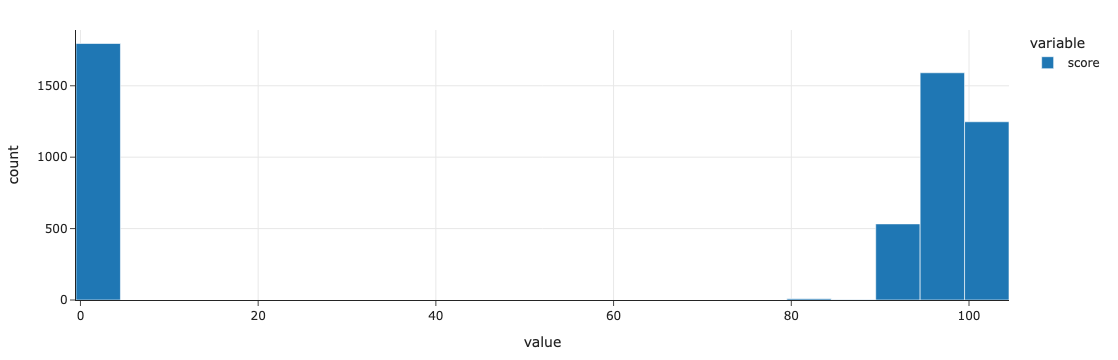

In [121]:
fig = px.histogram(insp['score'])
fig.show()

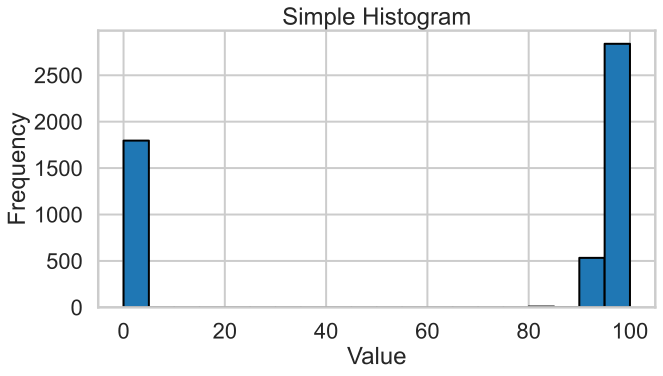

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram
plt.hist(insp['score'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Simple Histogram')

# Show the plot
plt.show()

How about the distribution of average inspection `'score'` per `'grade'`?

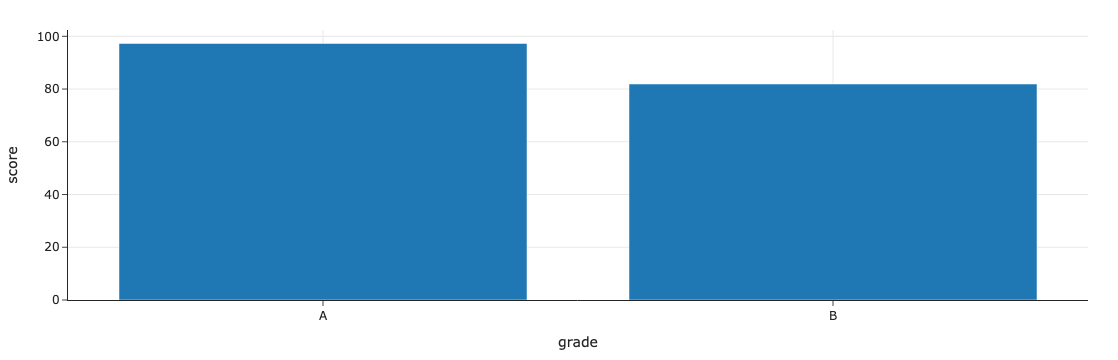

In [123]:
scores = (
    insp[['grade', 'score']]
    .dropna()
    .groupby('grade')
    .mean()
    .reset_index()
)
# px.bar wants a DataFrame with two columns, one with the labels and one with the values.
px.bar(scores, x='grade', y='score')

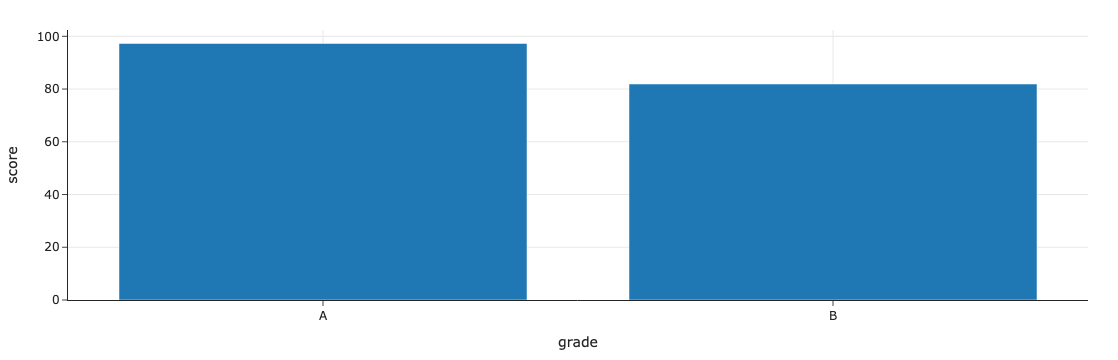

In [124]:
# Same as the above!
scores.plot(kind='bar', x='grade', y='score')

## Exploratory data analysis and feature types

### The data science lifecycle, revisited

<center>
    <img src="imgs/ds-lifecycle.svg" width=50%>
</center>

We're at the stage of **understanding the data**.

### Exploratory data analysis (EDA)

- Historically, data analysis was dominated by formal statistics, including tools like confidence intervals, hypothesis tests, and statistical modeling.

- In 1977, John Tukey [defined](https://search.worldcat.org/title/3058187) the term **exploratory data analysis**, which described a philosophy for proceeding about data analysis:

> Exploratory data analysis is actively incisive, rather than passively descriptive, with real emphasis on the discovery of the unexpected.



- Practically, EDA involves, among other things, computing summary statistics and drawing plots to understand the nature of the data at hand.

> The greatest gains from data come from surprises… The unexpected is best brought to our attention by **pictures**.

### Different feature types

<center><img src='imgs/data-types.png' width=90%></center>

<div class="alert alert-success" markdown="1">
    <h3>Exercise</h3>
    Determine the <b>feature type</b> of each of the following variables.
    
- `insp['score']`
- `insp['grade']`
- `viol['violation_accela']`
- `viol['major_violation']`
- `rest['business_id']`
- `rest['opened_date']`

</div>



In [125]:
# Your code goes here.

### Feature types vs. data types

- The data type `pandas` uses is not the same as the "data type" we talked about just now!
    - There's a difference between feature type and computational data type.

- Take care when the two don't match up very well!

In [126]:
# pandas stores these as ints, but they're actually nominal.
rest['business_id']

0      211898487641
1      211930769329
2      211909057778
           ...     
997    211899338714
998    211942150255
999    211925713322
Name: business_id, Length: 1000, dtype: int64

In [127]:
# pandas stores these as strings, but they're actually numeric.
rest['opened_date']

0      2002-05-05
1      2023-07-24
2      2019-01-22
          ...    
997    2002-05-05
998    2016-11-03
999    2022-11-03
Name: opened_date, Length: 1000, dtype: object

## Data cleaning

### Four pillars of data cleaning

When loading in a dataset, to clean the data – that is, to prepare it for further analysis – we will:

1. Perform **data quality checks**.

2. Identify and handle **missing values**.

3. Perform **transformations**, including converting time series data to **timestamps**.

4. Modify **structure** as necessary.

## Data cleaning: Data quality checks

### Data quality checks

We often start an analysis by checking the quality of the data.

- Scope: Do the data match your understanding of the population? 
- Measurements and values: Are the values reasonable?
- Relationships: Are related features in agreement?
- Analysis: Which features might be useful in a future analysis? 

### Scope

Do the data match your understanding of the population?

We were told that we're only looking at the 1000 restaurants closest to UCSD, so the restaurants in `rest` should agree with that.

In [128]:
rest.sample(5)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
180,211938834866,WOLFGANG PUCK CATERING,Restaurant Food Facility,"9775 TOWNE CENTER DR, SAN DIEGO, CA 92121-1968",...,32.89,-117.21,2021-06-17,1.49
347,211901887057,HOTEL LA JOLLA,Restaurant Food Facility,"7955 LA JOLLA SHORES DR, LA JOLLA, CA 92037-3301",...,32.85,-117.25,2022-01-21,2.29
491,211898990169,HENNESSEYS TAVERN,Restaurant Food Facility,"7809 HERSCHEL AVE, LA JOLLA, CA 92037",...,32.85,-117.27,2010-09-16,3.26
107,211898293573,GREEN HOSPITAL,Restaurant Food Facility,"10666 N TORREY PINES RD, LA JOLLA, CA 92037",...,32.90,-117.24,2002-05-05,1.23
654,211983837265,THE COVE AT LA JOLLA,Licensed Health Care Facility,"7160 FAY AVE, LA JOLLA, CA 92037",...,32.84,-117.27,2014-12-08,3.78


### Measurements and values

Are the values reasonable?

Do the values in the `'grade'` column match what we'd expect grades to look like?

In [129]:
insp['grade'].value_counts()

grade
A    2978
B      11
Name: count, dtype: int64

What kinds of information does the `insp` DataFrame hold?

In [130]:
insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custom_id       5179 non-null   object 
 1   business_id     5179 non-null   int64  
 2   inspection_id   5179 non-null   int64  
 3   description     0 non-null      float64
 4   type            5179 non-null   object 
 5   score           5179 non-null   int64  
 6   grade           2989 non-null   object 
 7   completed_date  5179 non-null   object 
 8   status          5179 non-null   object 
 9   link            5179 non-null   object 
 10  status_link     5179 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 445.2+ KB


What's going on in the `'address'` column of `rest`?

In [131]:
# Are there multiple restaurants with the same address?
rest['address'].value_counts()

address
5300 GRAND DEL MAR CT, SAN DIEGO, CA 92130       9
8657 VILLA LA JOLLA DR, LA JOLLA, CA 92037       8
4545 LA JOLLA VILLAGE DR, SAN DIEGO, CA 92122    8
                                                ..
3963 GOVERNOR DR, SAN DIEGO, CA 92122            1
4041 GOVERNOR DR, SAN DIEGO, CA 92122-2520       1
2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014       1
Name: count, Length: 863, dtype: int64

In [132]:
# Keeps all rows with duplicate addresses.
(
    rest
    .groupby('address')
    .filter(lambda df: df.shape[0] >= 2)
    .sort_values('address')
)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
406,211899308875,NASEEMS BAKERY & KABOB,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2012-04-17,2.77
402,211898699154,HANAYA SUSHI CAFE,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2011-03-22,2.77
401,211899558107,ARMANDOS MEXICAN FOOD,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2005-06-28,2.77
...,...,...,...,...,...,...,...,...,...
575,211972411855,TARA HEATHER CAKE DESIGN,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",...,32.90,-117.18,2014-04-24,3.51
344,211990537315,COMPASS GROUP FEDEX EXPRESS OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",...,32.89,-117.20,2022-10-19,2.27
343,211976587262,CANTEEN - FED EX OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",...,32.89,-117.20,2020-07-31,2.27


In [133]:
# Does the same thing as above!
(
    rest[rest.duplicated(subset=['address'], keep=False)]
    .sort_values('address')
)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
406,211899308875,NASEEMS BAKERY & KABOB,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2012-04-17,2.77
402,211898699154,HANAYA SUSHI CAFE,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2011-03-22,2.77
401,211899558107,ARMANDOS MEXICAN FOOD,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2005-06-28,2.77
...,...,...,...,...,...,...,...,...,...
575,211972411855,TARA HEATHER CAKE DESIGN,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",...,32.90,-117.18,2014-04-24,3.51
344,211990537315,COMPASS GROUP FEDEX EXPRESS OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",...,32.89,-117.20,2022-10-19,2.27
343,211976587262,CANTEEN - FED EX OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",...,32.89,-117.20,2020-07-31,2.27


### Relationships

Are related features in agreement?

Do the `'address'`es and `'zip'` codes in `rest` match?

In [134]:
rest[['address', 'zip']]

,address,zip
0,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037
1,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704
2,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037
...,...,...
997,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856
998,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130
999,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014


What about the `'score'`s and `'grade'`s in `insp`?

In [135]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
...,...,...
5176,0,NaN
5177,0,NaN
5178,90,A


### Analysis

Which features might be useful in a future analysis?

- We're most interested in:
    - These columns in the `rest` DataFrame: `'business_id'`, `'name'`, `'address'`, `'zip'`, and `'opened_date'`.
    - These columns in the `insp` DataFrame: `'business_id'`, `'inspection_id'`, `'score'`, `'grade'`, `'completed_date'`, and `'status'`.
    - These columns in the `viol` DataFrame: `'inspection_id'`, `'violation'`, `'major_violation'`, `'violation_text'`, and `'violation_accela'`.

- Also, let's rename a few columns to make them easier to work with.

### 💡 Pro-Tip: Using `pipe`

When we manipulate DataFrames, it's best to define individual functions for each step, then use the `pipe` **method** to chain them all together.

The `pipe` DataFrame method takes in a function, which itself takes in a DataFrame and returns a DataFrame.

- In practice, we would add functions one by one to the top of a notebook, then `pipe` them all.
- For today, will keep re-running `pipe` to show data cleaning process.

In [136]:
def subset_rest(rest):
    return rest[['business_id', 'name', 'address', 'zip', 'opened_date']]

rest = (
    pd.read_csv(rest_path)
    .pipe(subset_rest)
)
rest

,business_id,name,address,zip,opened_date
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05
1,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704,2023-07-24
2,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037,2019-01-22
...,...,...,...,...,...
997,211899338714,PACIFIC BEACH ELEMENTARY,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856,2002-05-05
998,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130,2016-11-03
999,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03


In [137]:
# Same as the above – but the above makes it easier to chain more .pipe calls afterwards.
subset_rest(pd.read_csv(rest_path))

,business_id,name,address,zip,opened_date
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,2002-05-05
1,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704,2023-07-24
2,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037,2019-01-22
...,...,...,...,...,...
997,211899338714,PACIFIC BEACH ELEMENTARY,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856,2002-05-05
998,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130,2016-11-03
999,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,2022-11-03


Let's use `pipe` to keep (and rename) the subset of the columns we care about in the other two DataFrames as well.

In [138]:
def subset_insp(insp):
    return (
        insp[['business_id', 'inspection_id', 'score', 'grade', 'completed_date', 'status']]
        .rename(columns={'completed_date': 'date'})
    )

insp = (
    pd.read_csv(insp_path)
    .pipe(subset_insp)
)

In [139]:
def subset_viol(viol):
    return (
        viol[['inspection_id', 'violation', 'major_violation', 'violation_accela']]
        .rename(columns={'violation': 'kind',
                         'major_violation': 'is_major',
                         'violation_accela': 'violation'})
    )

viol = (
    pd.read_csv(viol_path)
    .pipe(subset_viol)
)

### Combining the restaurant data

Let's join all three DataFrames together so that we have all the data in a single DataFrame.

In [140]:
def merge_all_restaurant_data():
    return (
        rest
        .merge(insp, on='business_id', how='left')
        .merge(viol, on='inspection_id', how='left')
    )

df = merge_all_restaurant_data()
df

,business_id,name,address,zip,...,status,kind,is_major,violation
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Hot and Cold Water,Y,21. Hot & cold water available
1,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Hot and Cold Water,N,21. Hot & cold water available
2,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
...,...,...,...,...,...,...,...,...,...
8728,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,"Equipment and Utensil Storage, Use",N,"35. Equipment / Utensils -approved, installed,..."
8729,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,Toilet Facilities,N,"43. Toilet facilities -properly constructed, s..."
8730,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,"Floors, Walls, and Ceilings",N,"45. Floor, walls and ceilings - built, maintai..."


## Data cleaning: Missing values

### Missing values

Next, it's important to check for and handle missing values, as they can have a big effect on your analysis.

In [141]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
...,...,...
5176,0,NaN
5177,0,NaN
5178,90,A


In [142]:
# The proportion of values in each column that are missing.
insp.isna().mean()

business_id      0.00
inspection_id    0.00
score            0.00
grade            0.42
date             0.00
status           0.00
dtype: float64

In [143]:
# Why are there null values here?
# insp['inspection_id'] and viol['inspection_id'] don't have any null values...
df[df['inspection_id'].isna()]

,business_id,name,address,zip,...,status,kind,is_major,violation
759,211941133403,TASTY CHAI,"8878 REGENTS RD 105, SAN DIEGO, CA 92122-5853",92122-5853,...,NaN,NaN,NaN,NaN
1498,211915545446,EMBASSY SUITES SAN DIEGO LA JOLLA,"4550 LA JOLLA VILLAGE DR, SAN DIEGO, CA 92122-...",92122-1248,...,NaN,NaN,NaN,NaN
1672,211937443689,SERVICENOW,"4770 EASTGATE MALL, SAN DIEGO, CA 92121-1970",92121-1970,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8094,211997340975,COOKIE SCOOP,"7759 GASTON DR, SAN DIEGO, CA 92126-3036",92126-3036,...,NaN,NaN,NaN,NaN
8450,211900595220,I LOVE BANANA BREAD CO,"4068 DALLES AVE, SAN DIEGO, CA 92117-5518",92117-5518,...,NaN,NaN,NaN,NaN
8545,211963768842,PETRA KITCHEN,"5252 BALBOA ARMS DR 175, SAN DIEGO, CA 92117-4949",92117-4949,...,NaN,NaN,NaN,NaN


There are many ways of handling missing values, which we'll cover in an entire lecture next week. But a good first step is to check how many there are!

## Data cleaning: Transformations and timestamps

### Transformations and timestamps

From last class:

> A transformation results from performing some operation on every element in a sequence, e.g. a Series.

It's often useful to look at ways of transforming your data to make it easier to work with.

- Type conversions (e.g. changing the string `"$2.99"` to the number `2.99`).

- Unit conversion (e.g. feet to meters).

- Extraction (Getting `'vermin'` out of `'Vermin Violation Recorded on 10/10/2023'`).

### Creating timestamps

Most commonly, we'll parse dates into `pd.Timestamp` objects.

In [144]:
# Look at the dtype!
insp['date']

0       2023-02-16
1       2022-01-03
2       2020-12-03
           ...    
5176    2023-03-06
5177    2022-12-09
5178    2022-11-30
Name: date, Length: 5179, dtype: object

In [145]:
# This magical string tells Python what format the date is in.
# For more info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
date_format = '%Y-%m-%d'
pd.to_datetime(insp['date'], format=date_format)

0      2023-02-16
1      2022-01-03
2      2020-12-03
          ...    
5176   2023-03-06
5177   2022-12-09
5178   2022-11-30
Name: date, Length: 5179, dtype: datetime64[ns]

In [146]:
# Another advantage of defining functions is that we can reuse this function
# for the 'opened_date' column in `rest` if we wanted to.
def parse_dates(insp, col):
    date_format = '%Y-%m-%d'
    dates = pd.to_datetime(insp[col], format=date_format)
    return insp.assign(**{col: dates})

insp = (
    pd.read_csv(insp_path)
    .pipe(subset_insp)
    .pipe(parse_dates, 'date')
)

# We should also remake df, since it depends on insp.
# Note that the new insp is used to create df!
df = merge_all_restaurant_data()

In [147]:
# Look at the dtype now!
df['date']

0      2023-02-16
1      2022-01-03
2      2020-12-03
          ...    
8728   2022-11-30
8729   2022-11-30
8730   2022-11-30
Name: date, Length: 8731, dtype: datetime64[ns]

### Working with timestamps

- We often want to adjust granularity of timestamps to see overall trends, or seasonality.
- Use the `resample` method in `pandas` ([documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)).
    - Think of it like a version of `groupby`, but for timestamps.
    - For instance, `insp.resample('2W', on='date')` separates every two weeks of data into a different group.

In [150]:
insp.resample('2W', on='date').mean(numeric_only = True)

,business_id,inspection_id,score
date,,,
2020-01-05,2.12e+11,6.35e+06,42.67
2020-01-19,2.12e+11,6.30e+06,59.33
2020-02-02,2.12e+11,6.32e+06,56.34
...,...,...,...
2023-09-24,2.12e+11,7.15e+06,66.60
2023-10-08,2.12e+11,7.19e+06,59.58
2023-10-22,2.12e+11,7.20e+06,66.81


In [151]:
# Where are those numbers coming from?
insp[
    (insp['date'] >= pd.Timestamp('2020-01-05')) &
    (insp['date'] < pd.Timestamp('2020-01-19'))
]['score'].mean()

np.float64(59.325581395348834)

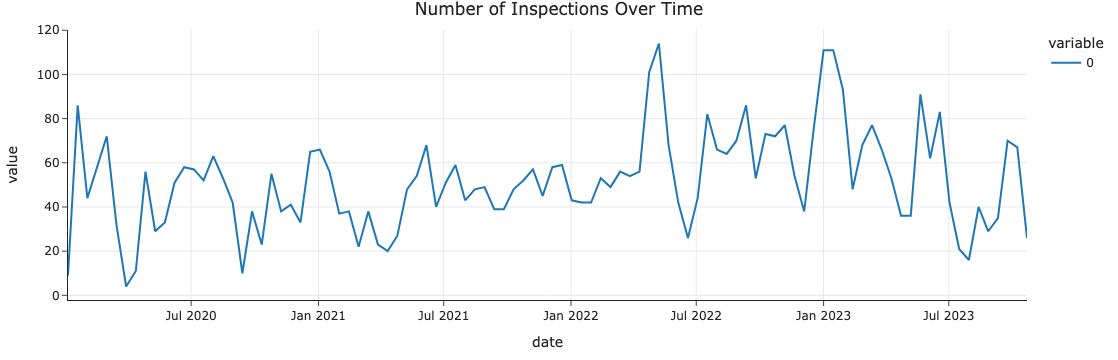

In [159]:
(insp.resample('2W', on='date')
 .size()
 .plot(title='Number of Inspections Over Time')
)

### The `.dt` accessor

Like with Series of strings, `pandas` has a `.dt` accessor for properties of timestamps ([documentation](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors)).

In [160]:
insp['date']

0      2023-02-16
1      2022-01-03
2      2020-12-03
          ...    
5176   2023-03-06
5177   2022-12-09
5178   2022-11-30
Name: date, Length: 5179, dtype: datetime64[ns]

In [161]:
insp['date'].dt.day

0       16
1        3
2        3
        ..
5176     6
5177     9
5178    30
Name: date, Length: 5179, dtype: int32

In [162]:
insp['date'].dt.dayofweek

0       3
1       0
2       3
       ..
5176    0
5177    4
5178    2
Name: date, Length: 5179, dtype: int32

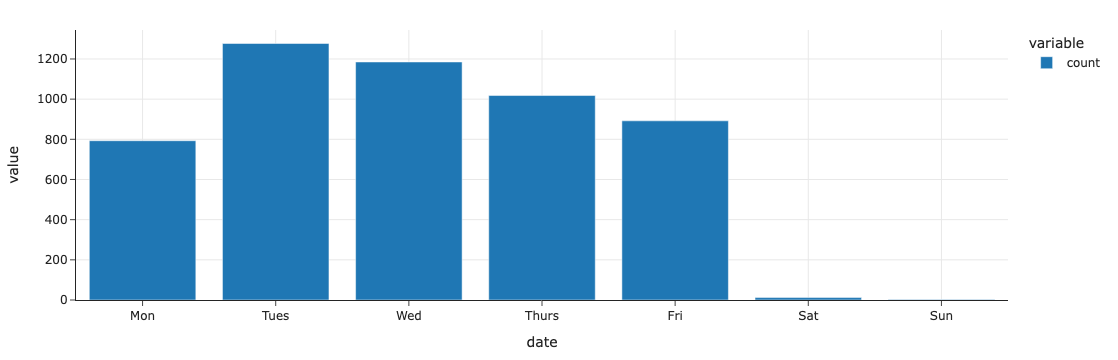

In [163]:
dow_counts = insp['date'].dt.dayofweek.value_counts()
fig = px.bar(dow_counts)
fig.update_xaxes(tickvals=np.arange(7), ticktext=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

## Data cleaning: Modifying structure

### Reshaping DataFrames

We often **reshape** the DataFrame's structure to make it more convenient for analysis. For example, we can:

- Simplify structure by removing columns or taking a set of rows for a particular period of time or geographic area.
    - We already did this!

- Adjust granularity by aggregating rows together.
    - To do this, use `groupby` (or `resample`, if working with timestamps).

- Reshape structure, most commonly by using the DataFrame `melt` method to un-pivot a dataframe.

### Using `melt`

- The `melt` method is common enough that we'll give it a special mention.
- We'll often encounter pivot tables (esp. from government data), which we call *wide* data.
- The methods we've introduced work better with *long-form* data, or *tidy* data.
- To go from wide to long, `melt`.

<center><img src='imgs/wide-vs-long.svg' width=40%></center>

### Example usage of `melt`

In [164]:
wide_example = pd.DataFrame({
    'Year': [2001, 2002],
    'Jan': [10, 130],
    'Feb': [20, 200],
    'Mar': [30, 340]
}).set_index('Year')
wide_example

,Jan,Feb,Mar
Year,,,
2001,10,20,30
2002,130,200,340


In [165]:
wide_example.melt(ignore_index=False)

,variable,value
Year,,
2001,Jan,10
2002,Jan,130
2001,Feb,20
2002,Feb,200
2001,Mar,30
2002,Mar,340


## Exploration

### Can we rank restaurants by their number of violations?

And why would we want to do that? 🤔

In [166]:
df

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,business_id,name,address,zip,...,status,kind,is_major,violation
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Hot and Cold Water,Y,21. Hot & cold water available
1,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Hot and Cold Water,N,21. Hot & cold water available
2,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037,...,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
...,...,...,...,...,...,...,...,...,...
8728,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,"Equipment and Utensil Storage, Use",N,"35. Equipment / Utensils -approved, installed,..."
8729,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,Toilet Facilities,N,"43. Toilet facilities -properly constructed, s..."
8730,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014,...,Complete,"Floors, Walls, and Ceilings",N,"45. Floor, walls and ceilings - built, maintai..."


### How about separately for each zip code?

And why would we want to do that? 🤔

## Summary, next time

### Summary

- Data cleaning is a necessary starting step in data analysis. There are four pillars of data cleaning:
    - Quality checks.
    - Missing values.
    - Transformations and timestamps.
    - Modifying structure.
- Approach EDA with an open mind, and draw lots of visualizations.

### Next time

Hypothesis and permutation testing. Some of this will be DSC 10 review, but we'll also push further! **Expect a pre-lecture reading tomorrow!**